In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('data/house.csv')

In [3]:
df1.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
df1.shape

(2226382, 12)

In [5]:
df1.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


Veri setindeki ev büyüklüğü ayak kare cinsinden ve arazi büyüklüğü akre cinsinden gösterilir, bu ikisi ifadeler değerleri metre kare'ye dönüştürülür

In [3]:
df1.loc[:, 'house_size'] = df1['house_size'] * 0.09

In [4]:
df1.loc[:, 'acre_lot'] = df1['acre_lot'] * 4046.86

In [8]:
df1.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

acente bilgileri, ev durumu ve önceki satış tarihi önemsiz bilgileri olduğu için veri kümesinden kaldırdım

In [5]:
df1.drop(['brokered_by', 'status', 'prev_sold_date'], axis=1, inplace=True)

Veri setinde evin ve arsanın büyüklüğü gibi çok önemli eksik bilgiler bulunmakta ve birçok örneğin özelliklerinin yarısı eksiktir. Modelli yanlış bilgilerden etkilenmesini önlemek için, ev ve arasanın büyüklüğü bilgiler eksik olan örnekleri kaldıracağız.

In [6]:
df1.dropna(subset=['price', 'state', 'house_size', 'acre_lot'], axis=0, inplace=True)

In [11]:
df1.shape

(1381351, 9)

In [32]:
df1.isnull().sum()

price             0
bed           14617
bath          17696
acre_lot          0
street         4150
city            335
state             0
zip_code         96
house_size        0
dtype: int64

Eksik sokak değerleri için, öncelikle veri setini il ve şehre göre düzenlememiz gerekir, ardından eksik bilgiler önceki sokak değerleriyle doldurulacaktır çünkü önceki veriler aynı il ve şehre sahip olacaktır.

In [7]:
df1 = df1.sort_values(by=['state', 'city'])

In [8]:
df1.loc[:, 'street'] = df1['street'].ffill()
df1.loc[:, 'city'] = df1['city'].ffill()
df1.loc[:, 'zip_code'] = df1['zip_code'].ffill()

In [34]:
df1.isnull().sum()

price             0
bed           14617
bath          17696
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
dtype: int64

Bu veri setinde bazı yanlış değerler ve aykırı değerler var, bunların kaldırılması model performansını ve tahminini iyileştirecektir

In [9]:
df2 = df1[~((df1['price'] <= 0) | (df1['house_size'] <= 0))]

Ev büyüklüğünden daha küçük arazi büyüklüğüne sahip verilerin kaldırılması (daireler gibi emlak dahil değildir)

In [10]:
df3 = df2[~((df2['acre_lot'] < df2['house_size']) & (df2['acre_lot'] != 0))]

Yatakların ve banyoların evin kendisinden daha büyük olduğunu gösteren verilerin kaldırılması

In [11]:
df4 = df3[~(df3['bed'] * 1.62 + df3['bath'] * 3.33 > df3['house_size'])]

Metrekare fiyatı çok küçük veya çok büyük olan evler kaldırılıyor

In [12]:
price_per_squared_meter = df4['price'] / df4['house_size']
df5 = df4[~((price_per_squared_meter < 110) | (price_per_squared_meter > 110000))]

Eksik yatak ve banyo bulunan veriler, ev büyüklüğüne göre en fazla bulunan değerle doldurulacaktır

In [13]:
big_house_bed = df5[df5['house_size'] > 900]['bed'].mode()[0]
big_house_bath = df5[df5['house_size'] > 900]['bath'].mode()[0]

average_bed = df5['bed'].mode()[0]
average_bath = df5['bath'].mode()[0]

In [14]:
def fill_bed(house_size):
    if house_size > 900:
        return big_house_bed
    else:
        return average_bed

In [15]:
def fill_bath(house_size):
    if house_size > 900:
        return big_house_bath
    else:
        return average_bath

In [16]:
df5.loc[:, 'bed'] = df5.apply(
    lambda df5_row: fill_bed(df5_row['house_size']) if pd.isnull(df5_row['bed']) else df5_row['bed'], axis=1)
df5.loc[:, 'bath'] = df5.apply(
    lambda df5_row: fill_bath(df5_row['house_size']) if pd.isnull(df5_row['bath']) else df5_row['bath'], axis=1)

il ve şehir değerleri dizedir ve problemimiz bir regresyon problemi olduğundan tüm veri kümesi değerleri sayısal olmalıdır, bu nedenle il ve şehir her değer için ortalama fiyatla değiştirilecektir.

In [17]:
df6 = df5.copy()
state_average_price = df6.groupby('state')['price'].mean()
df6.loc[:, 'state_average_price'] = df6['state'].map(state_average_price)

In [18]:
city_average_price = df6.groupby(['state', 'city'])['price'].mean()
df6['city_average_price'] = df6.apply(lambda df6_row: city_average_price.loc[df6_row['state'], df6_row['city']], axis=1)

Veri setinden il ve şehir dize değerlerini kaldıracağız

In [19]:
df6.drop(['state', 'city'], axis=1, inplace=True)

In [20]:
df7 = df6.drop_duplicates()

bu ısı haritası her özellik kombinasyonu için veri korelasyon değerini gösterir, değer ne kadar yüksekse bir özellik diğer bir özellik ile o kadar fazla korelasyona sahiptir

<Axes: >

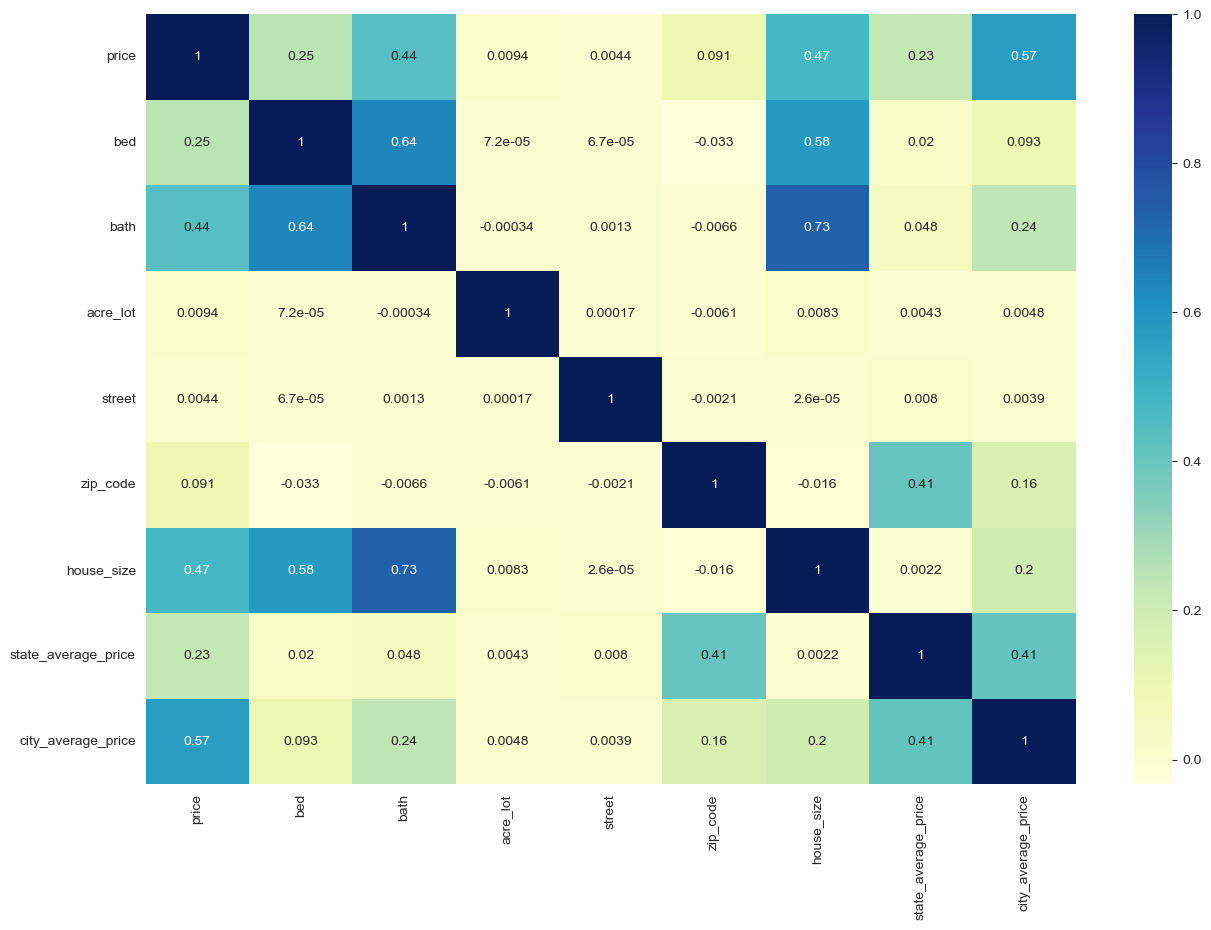

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df7.corr(), annot=True, cmap="YlGnBu")

bu her özellik için bir histogram oluşturur

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'street'}>,
        <Axes: title={'center': 'zip_code'}>],
       [<Axes: title={'center': 'house_size'}>,
        <Axes: title={'center': 'state_average_price'}>,
        <Axes: title={'center': 'city_average_price'}>]], dtype=object)

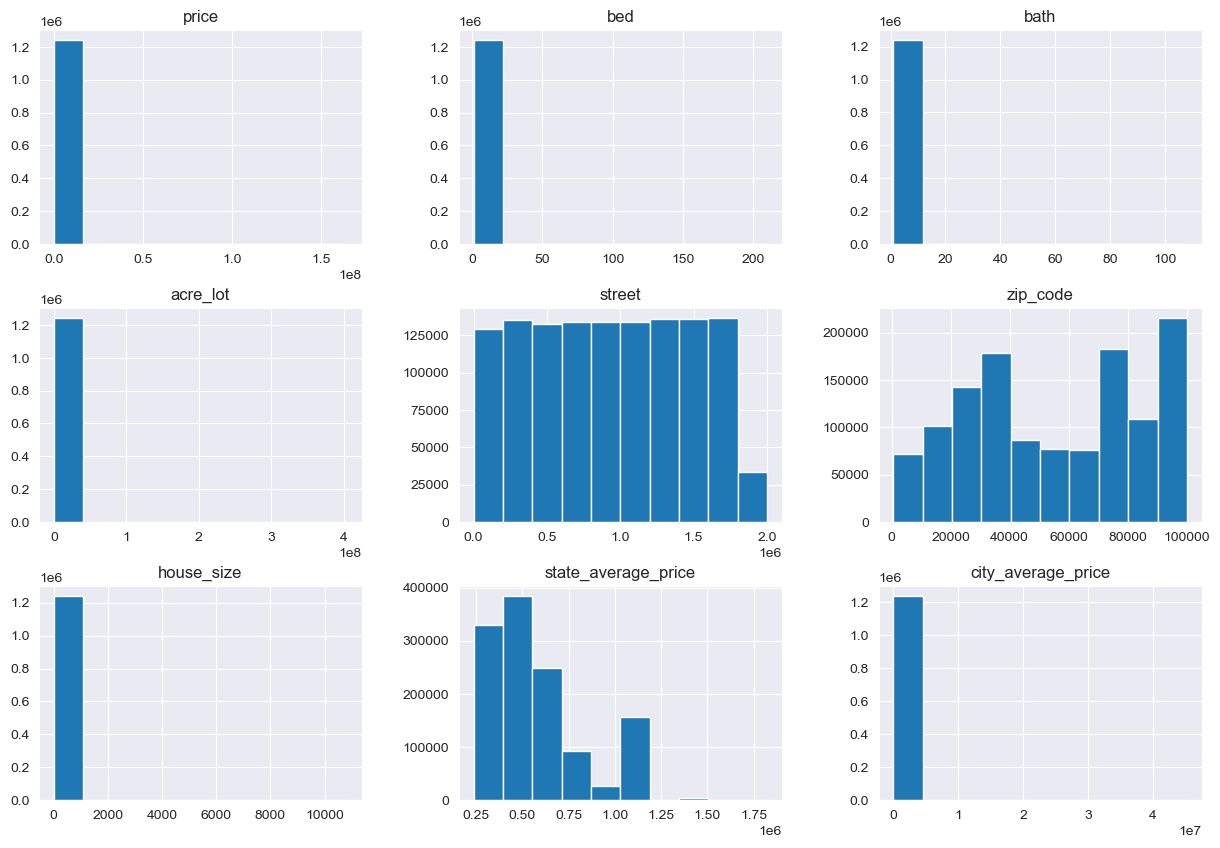

In [21]:
df7.hist(figsize=(15, 10))

Dağılımı daha simetrik ve normale yakın hale getirmek için logaritmik dönüşümü kullanacağız.

In [22]:
df8 = df7.copy()

df8['price'] = np.log(df8['price'] + 1)
df8['house_size'] = np.log(df8['house_size'] + 1)
df8['acre_lot'] = np.log(df8['acre_lot'] + 1)
df8['city_average_price'] = np.log(df8['city_average_price'] + 1)
df8['state_average_price'] = np.log(df8['state_average_price'] + 1)
df8['bath'] = np.log(df8['bath'] + 1)
df8['bed'] = np.log(df8['bed'] + 1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'street'}>,
        <Axes: title={'center': 'zip_code'}>],
       [<Axes: title={'center': 'house_size'}>,
        <Axes: title={'center': 'state_average_price'}>,
        <Axes: title={'center': 'city_average_price'}>]], dtype=object)

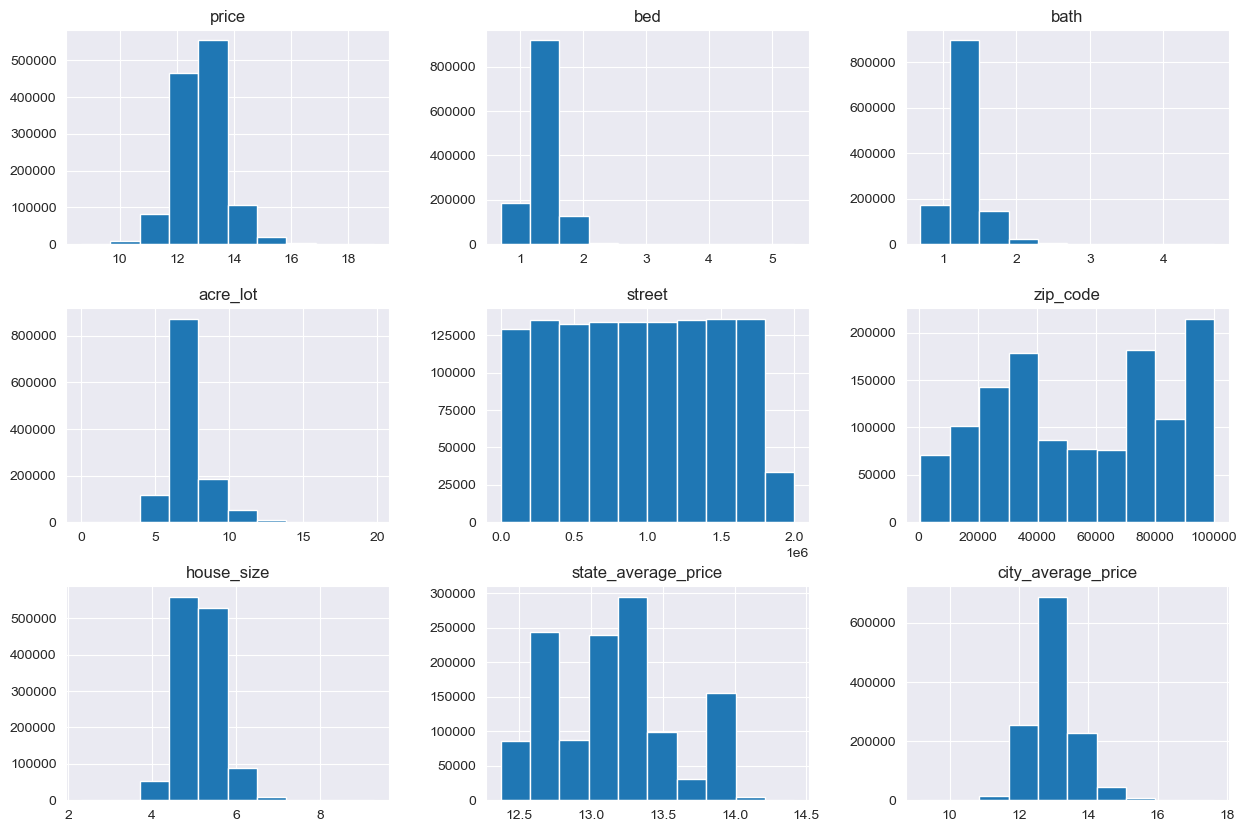

In [26]:
df8.hist(figsize=(15, 10))

Veri seti eğitim verileri ve test verileri olarak ikiye ayrılacak

In [23]:
x = df8.drop('price', axis=1)
y = df8['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model Performansını Değerlendirme Fonksiyonu

In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def model_analysis(test, pred):
    mae = mean_absolute_error(test, pred)
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(test, pred)

    print(f"Ortalama Mutlak Hata {mae}")
    print(f"Ortalama Karesel Hata: {mse}")
    print(f"Kök Ortalama Karesel Hata: {rmse}")
    print(f"R² Skor: {r2}")


Kalıntı analizi görselleştirme fonksiyonu

In [29]:
def residual_analysis(test, pred):
    residuals = test - pred

    plt.scatter(pred, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Predicted")
    plt.show()

    sns.histplot(residuals, kde=True)
    plt.title("Histogram of Residuals")
    plt.show()


Doğrusal regresyon kullanarak modelleme

In [149]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [150]:
y_pred = lin.predict(X_test)

In [151]:
model_analysis(y_test, y_pred)

Ortalama Mutlak Hata 0.2811538942727926
Ortalama Karesel Hata: 0.15071327689866507
Kök Ortalama Karesel Hata: 0.38821807904664235
R² Skor: 0.7800153616400755


In [152]:
pd.DataFrame(np.exp(y_pred), np.exp(y_test))

,0
price,
540001.0,523144.955599
160001.0,221734.160018
334001.0,325929.166679
399001.0,460980.125100
284901.0,211169.014131
...,...
154901.0,81064.144152
23001.0,71205.955175
359901.0,411450.875758


algoritma için farklı puan değerlerini görmek için verileri karıştırma ve bölme işlemi

In [35]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.78050739, 0.77982312, 0.77969853, 0.78053839, 0.78028074])

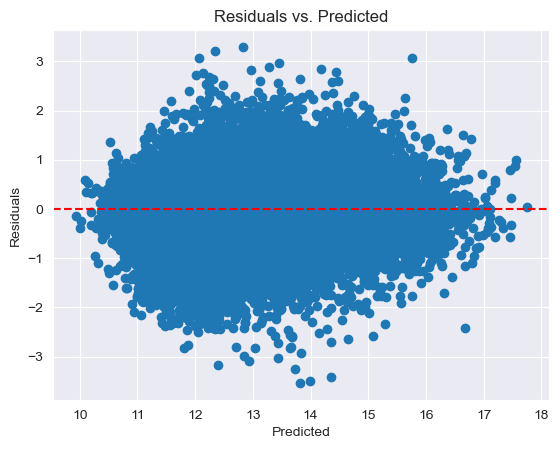

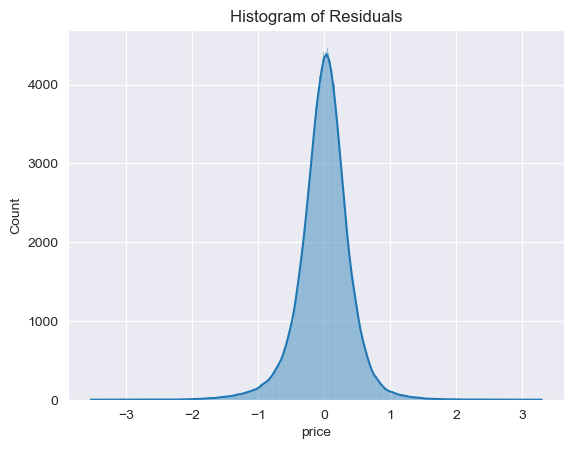

In [36]:
residual_analysis(y_test, y_pred)

Rastgele Orman Regresyonu kullanarak modelleme

In [153]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [158]:
y_pred = rf.predict(X_test)

In [39]:
model_analysis(y_test, y_pred)

Ortalama Mutlak Hata 0.21320462260298187
Ortalama Karesel Hata: 0.10054365118514055
Kök Ortalama Karesel Hata: 0.31708618889056106
R² Skor: 0.8532441255310171


In [159]:
pd.DataFrame(np.exp(y_pred), np.exp(y_test))

,0
price,
540001.0,546698.272793
160001.0,184920.866703
334001.0,271096.603953
399001.0,408721.185560
284901.0,230852.626013
...,...
154901.0,78656.571313
23001.0,34142.916479
359901.0,435077.457827


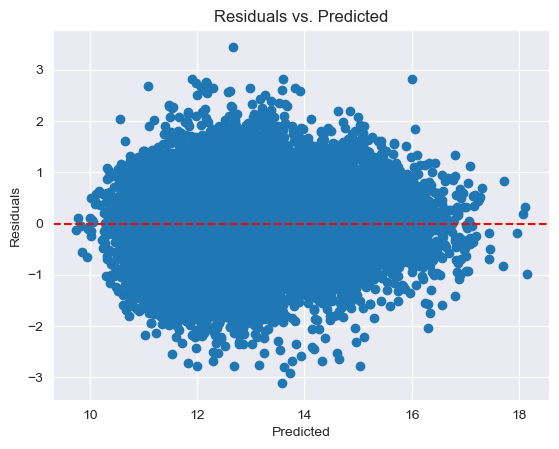

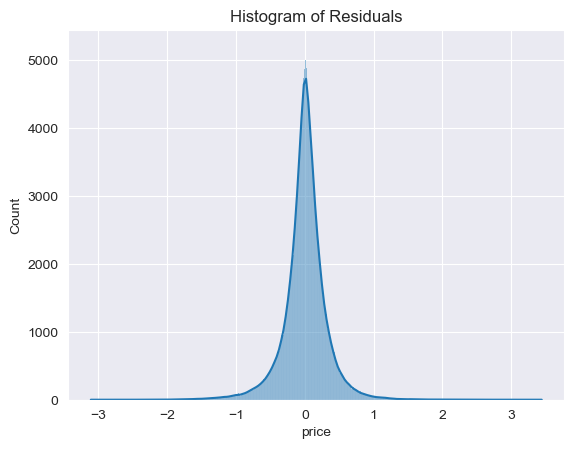

In [40]:
residual_analysis(y_test, y_pred)

Gradient Boosting regresyon kullanarak modelleme

In [155]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [156]:
y_pred = gb.predict(X_test)

In [43]:
model_analysis(y_test, y_pred)

Ortalama Mutlak Hata 0.26032199453160704
Ortalama Karesel Hata: 0.13340277238111406
Kök Ortalama Karesel Hata: 0.3652434426257562
R² Skor: 0.8052821805592986


In [157]:
pd.DataFrame(np.exp(y_pred), np.exp(y_test))

,0
price,
540001.0,632271.009802
160001.0,226602.968890
334001.0,315971.109943
399001.0,465901.795252
284901.0,200164.628205
...,...
154901.0,76274.371289
23001.0,61469.751666
359901.0,428811.172275


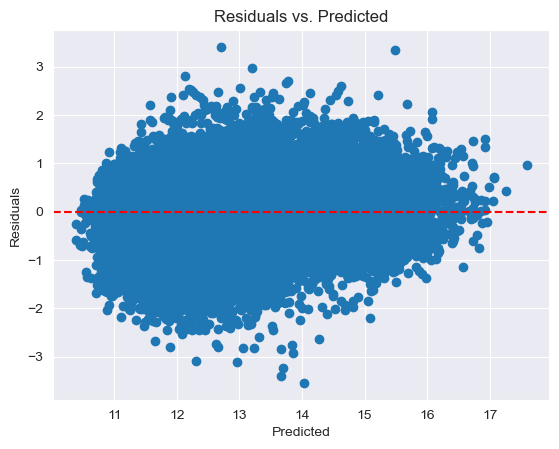

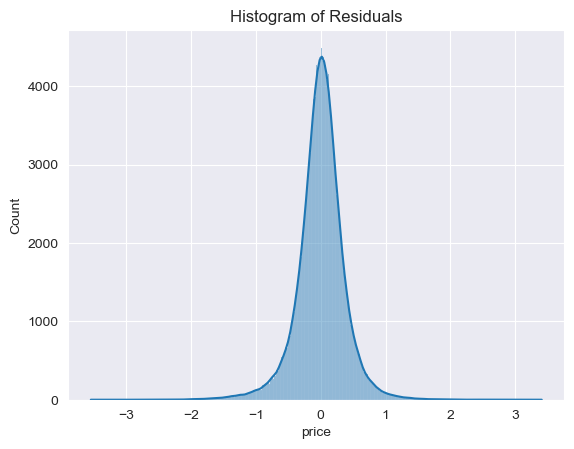

In [44]:
residual_analysis(y_test, y_pred)

Malatya Centrality algoritmasını kullanarak emlak fiyatlarını tahmin etmek

In [29]:
df8['price'].describe()

count    1.240305e+06
mean     1.284586e+01
std      8.291757e-01
min      8.646641e+00
25%      1.236735e+01
50%      1.283468e+01
75%      1.330452e+01
max      1.892146e+01
Name: price, dtype: float64

In [24]:
less_than_25 = df8['price'].describe()['25%']
less_than_50 = df8['price'].describe()['50%']
less_than_75 = df8['price'].describe()['75%']

In [25]:
def data_price_labeling(price):
    if price <= less_than_25:
        return 'less than 25%'
    elif less_than_25 < price <= less_than_50:
        return 'between 25% and 50%'
    elif less_than_50 < price <= less_than_75:
        return 'between 50% and 75%'
    else:
        return 'above 75%'

In [26]:
df9 = df8.copy()

df9.loc[:, 'class'] = df9.apply(lambda sample: data_price_labeling(sample['price']), axis=1)

In [27]:
x = df9.drop('class', axis=1)
y = df9['class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

train_data = X_train.join(y_train)

In [164]:
def get_best_similar_nodes(data, cls, size, best):
    dataset = train_data[train_data['class'] == cls].drop('class', axis=1)

    node_list = [{'index': 0, 'similarities': 0} for _ in range(size)]

    data_array = dataset.iloc[:size].to_numpy()
    index_array = dataset.index[:size]
    data = np.array(data)

    for i in range(size):
        compare_by_data = data_array[i]
        node_list[i]['index'] = index_array[i]

        similarities = (data == compare_by_data).sum()
        node_list[i]['similarities'] = similarities

    sorted_dict = sorted(node_list, key=lambda item: item['similarities'], reverse=True)

    best_node = sorted_dict[:best]

    return best_node

In [243]:
def malatya_centrality(lst):
    graph = [{'index': 0, 'weight': 0, 'links': []} for _ in range(len(lst) + 1)]

    main_node_weight = sum(node['similarities'] for node in lst)

    graph[0] = {'index': 0, 'weight': main_node_weight, 'links': lst}

    for i in range(len(lst)):
        current_data = X_train.loc[lst[i]['index']].to_numpy()
        graph[i + 1]['index'] = lst[i]['index']

        for j in range(i + 1, len(lst)):
            compare_by_data = X_train.loc[lst[j]['index']].to_numpy()
            similarities = (current_data == compare_by_data).sum()
            graph[i + 1]['links'].append({'index': lst[j]['index'], 'similarities': similarities})
            graph[i + 1]['weight'] += similarities

    for i in range(len(lst)):
        top = 0
        for j in range(i + 1):
            top += [link for link in graph[j]['links'] if link['index'] == lst[i]['index']][0]['similarities']
        graph[i + 1]['weight'] += top

    for i, current_node in enumerate(graph):
        centrality = 0
        for compared_node in graph:
            if compared_node['index'] != current_node['index']:
                centrality += (current_node['weight'] / compared_node['weight'])
                graph[i]['centrality'] = centrality

    return graph[0]['centrality'], graph


In [256]:
def class_predict(data):
    best_nodes_less_than_25 = get_best_similar_nodes(data=data, cls='less than 25%', size=1000, best=10)
    best_nodes_between_25_and_50 = get_best_similar_nodes(data=data, cls='between 25% and 50%', size=1000, best=10)
    best_nodes_between_50_and_75 = get_best_similar_nodes(data=data, cls='between 50% and 75%', size=1000, best=10)
    best_nodes_above_75 = get_best_similar_nodes(data=data, cls='above 75%', size=1000, best=10)

    c1, _ = malatya_centrality(best_nodes_less_than_25)
    c2, _ = malatya_centrality(best_nodes_between_25_and_50)
    c3, _ = malatya_centrality(best_nodes_between_50_and_75)
    c4, _ = malatya_centrality(best_nodes_above_75)

    centrality_list = [c1, c2, c3, c4]
    graph_index = centrality_list.index(max(centrality_list))

    if graph_index == 0:
        return 'less than 25%'
    if graph_index == 1:
        return 'between 25% and 50%'
    if graph_index == 2:
        return 'between 50% and 75%'
    else:
        return 'above 75%'

In [240]:
import networkx as nx


def plot_graph(data):
    best_nodes_less_than_25 = get_best_similar_nodes(data=data, cls='less than 25%', size=1000, best=10)
    best_nodes_between_25_and_50 = get_best_similar_nodes(data=data, cls='between 25% and 50%', size=1000, best=10)
    best_nodes_between_50_and_75 = get_best_similar_nodes(data=data, cls='between 50% and 75%', size=1000, best=10)
    best_nodes_above_75 = get_best_similar_nodes(data=data, cls='above 75%', size=1000, best=10)

    _, g1 = malatya_centrality(best_nodes_less_than_25)
    _, g2 = malatya_centrality(best_nodes_between_25_and_50)
    _, g3 = malatya_centrality(best_nodes_between_50_and_75)
    _, g4 = malatya_centrality(best_nodes_above_75)

    graphs = [g1, g2, g3, g4]

    for graph in graphs:
        G = nx.Graph()

        node_list = [node for node in graph]

        G.add_nodes_from([node['index'] for node in node_list])

        edges = []

        for node in node_list:
            for link in node['links']:
                if link['similarities'] != 0:
                    edges.append((node['index'], link['index'], link['similarities']))

        G.add_edges_from([(u, v, {"label": label}) for u, v, label in edges])

        node_colors = ['yellow' if node == graph[0]['index'] else 'skyblue' for node in G.nodes]

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800)

        edge_labels = nx.get_edge_attributes(G, "label")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

        plt.show()


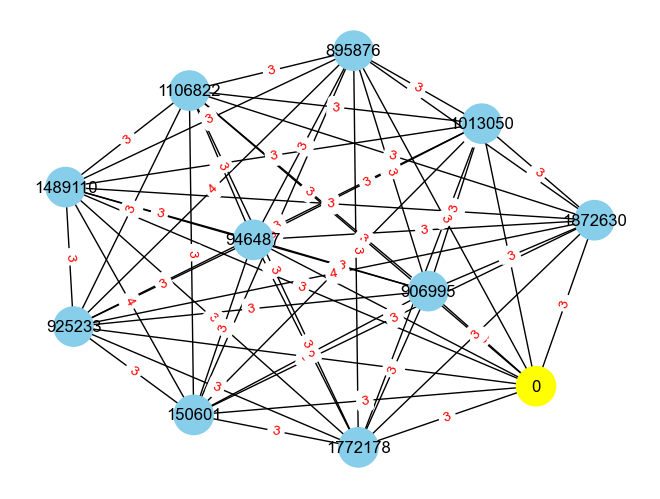

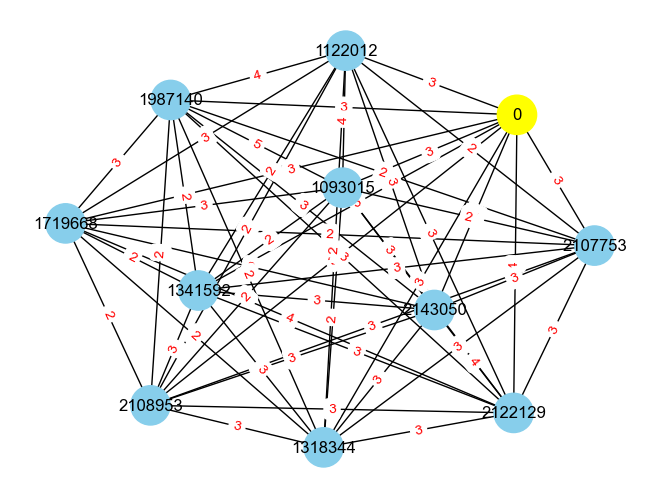

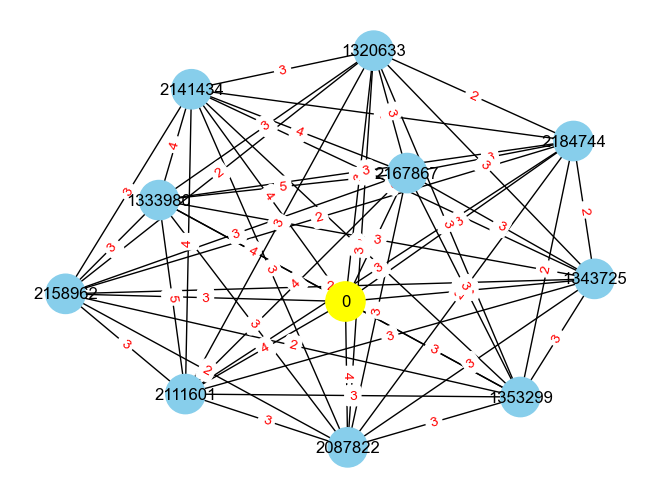

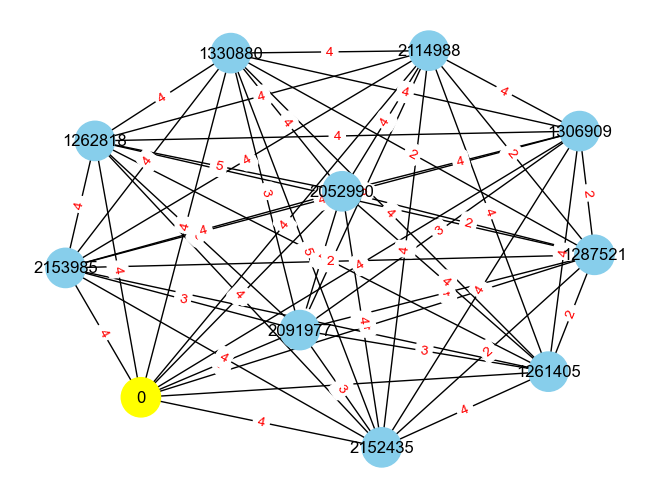

In [251]:
plot_graph(X_test.iloc[0])

In [284]:
y_pred = pd.DataFrame(
    {'class': [class_predict(data_point) for data_point in X_test.head(200).itertuples(index=False)]})

In [285]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test.head(200), y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.43


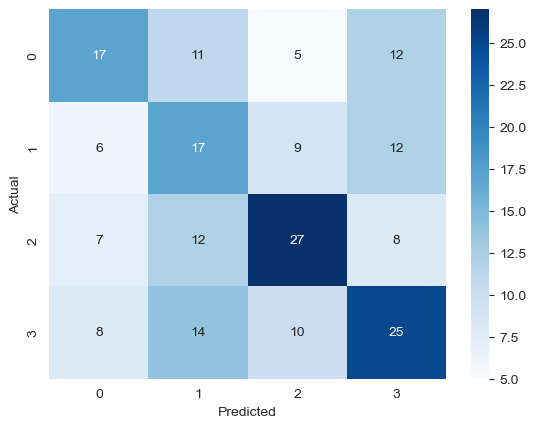

In [286]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.head(200), y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()